# Application of Machine Learning Models on the Prediction of Heart Failure due to Left Ventricular Systolic Dysfunction
by **Bitoon G.**, **Herrera J.**, **Lozada R.**, and **Medrano L.**

In this Jupyter notebook, we will go over the data and see it's distribution and correlation (exploratory data analysis). Furthermore, we will use different models (e.g. `KNN` and `XGBRFClassifier`) and assess their performance. Afterwards, we will select the model with the best accuracy and expound on the steps used in building that model. We will also assess the performance of the best model at a deeper level (i.e. we will generate a confusion matrix and classification report). Lastly, if allowed by the model, we will extract the feature importances to see which features encode the most information.

## Exploratory Data Analysis

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Importing the dataset

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Feature Information
- `age`: Age of the patient (years)
- `anaemia`: Decrease of red blood cells or hemoglobin (boolean)
- `creatinine_phosphokinase` (CPK): Level of the CPK enzyme in the blood (mcg/L)
- `diabetes`: If the patient has diabetes (boolean)
- `ejection_fraction`: Percentage of blood leaving the heart at each contraction (percentage)
- `high blood pressure`: If the patient has hypertension (boolean)
- `platelets`: Platelets in the blood (kiloplatelets/mL)
- `serum_creatinine`: Level of serum creatinine in the blood (mg/dL)
- `serum_sodium`: Level of serum sodium in the blood (mEq/L)
- `sex`: Woman or man (binary)
- `smoking`: If the patient smokes or not (boolean)
- `time`: Follow-up period (days)
- `DEATH_EVENT`: If the patient deceased during the follow-up period (boolean)  

### `age` Feature Analysis 

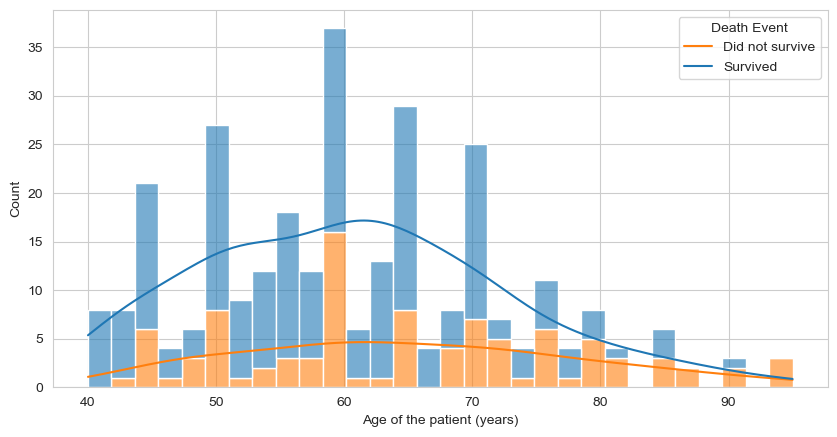

In [4]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df, x='age', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Age of the patient (years)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()
plt.show()

### `anaemia` Feature Analysis 

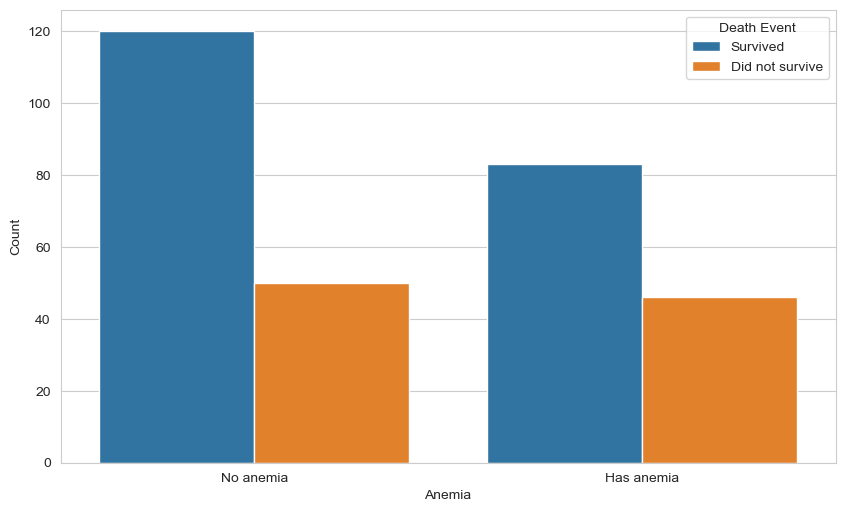

In [5]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='anaemia', hue='DEATH_EVENT')

plt.xlabel('Anemia')
plt.ylabel('Count')
plt.xticks([0, 1], ['No anemia', 'Has anemia'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `creatinine_phosphokinase` Feature Analysis 

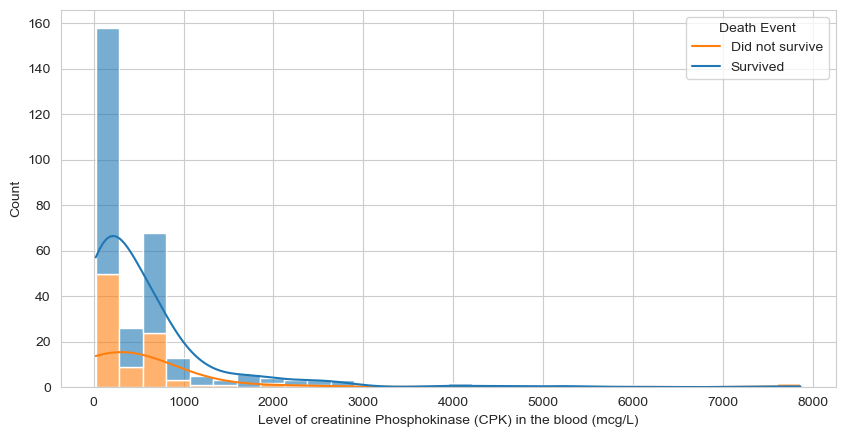

In [6]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Level of creatinine Phosphokinase (CPK) in the blood (mcg/L)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `diabetes` Feature Analysis 

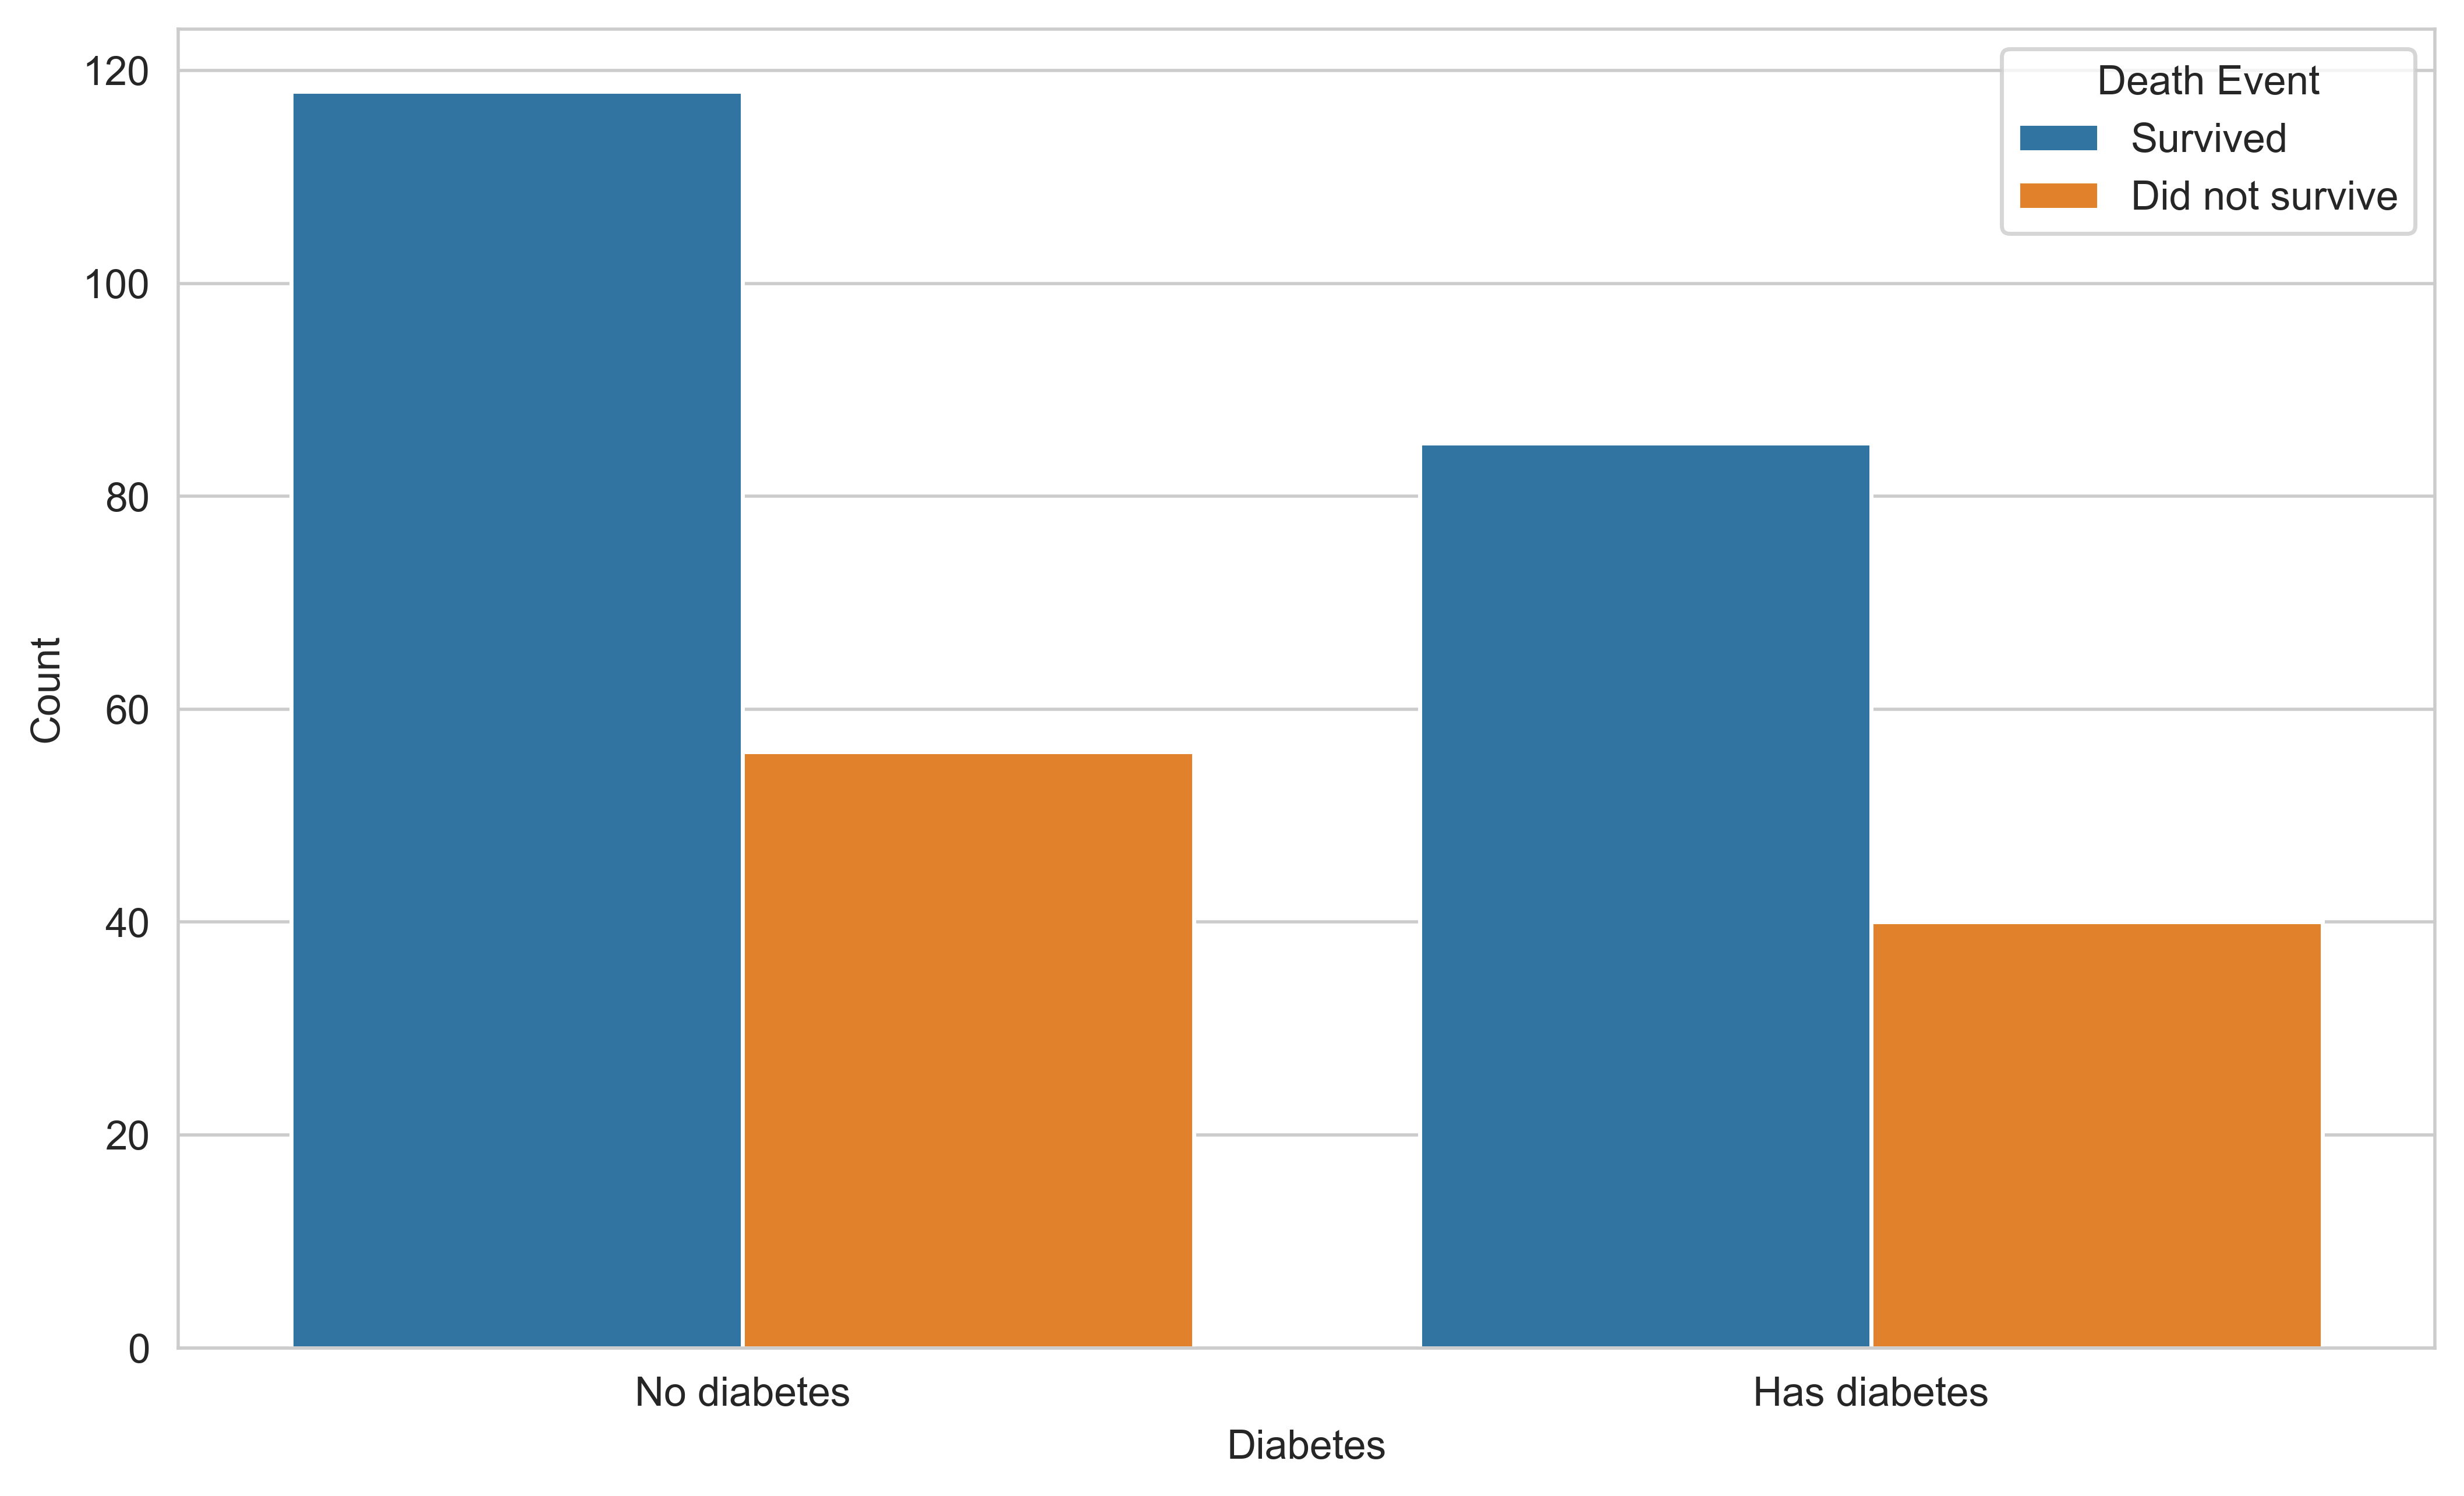

In [7]:
plt.figure(figsize=(10,6), dpi=500)
sns.countplot(data=df, x='diabetes', hue='DEATH_EVENT')

plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No diabetes', 'Has diabetes'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `ejection_fraction` Feature Analysis 

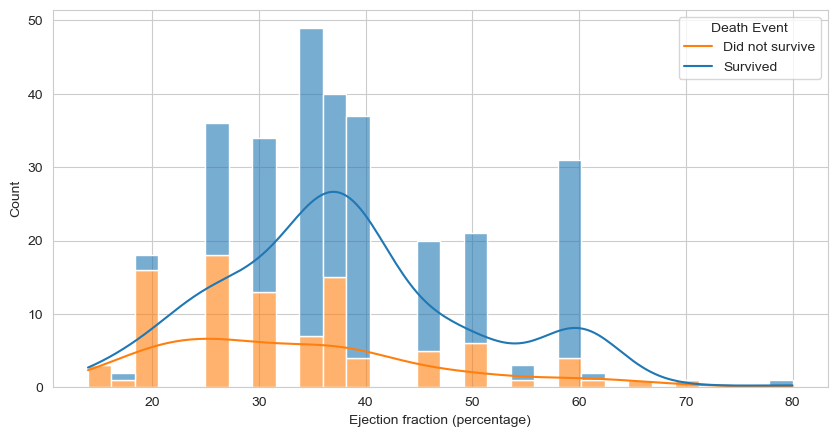

In [8]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Ejection fraction (percentage)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `high_blood_pressure` Feature Analysis

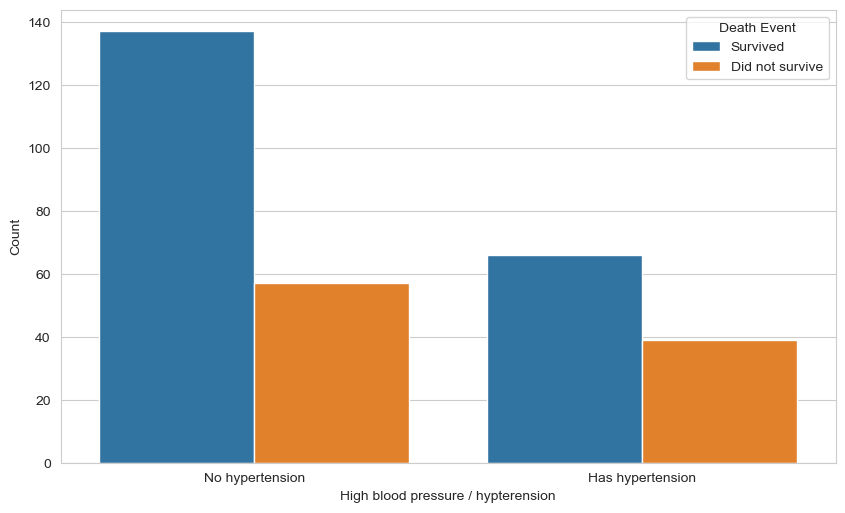

In [9]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='high_blood_pressure', hue='DEATH_EVENT')

plt.xlabel('High blood pressure / hypterension')
plt.ylabel('Count')
plt.xticks([0, 1], ['No hypertension', 'Has hypertension'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `platelets` Feature Analysis

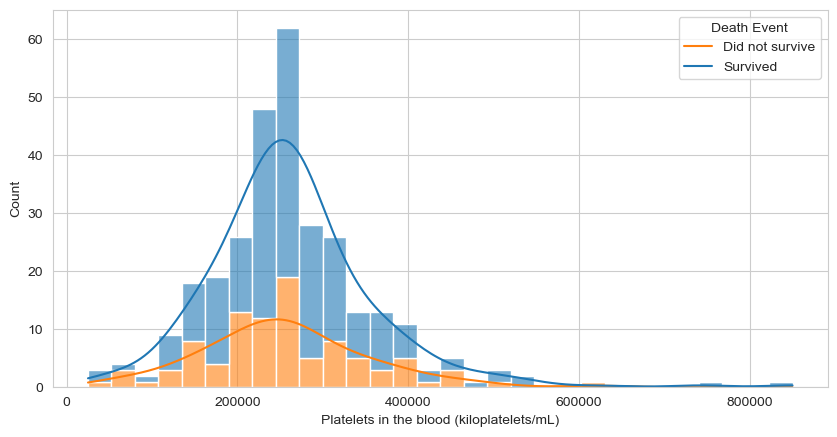

In [10]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df, x='platelets', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Platelets in the blood (kiloplatelets/mL)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `serum_creatinine ` Feature Analysis

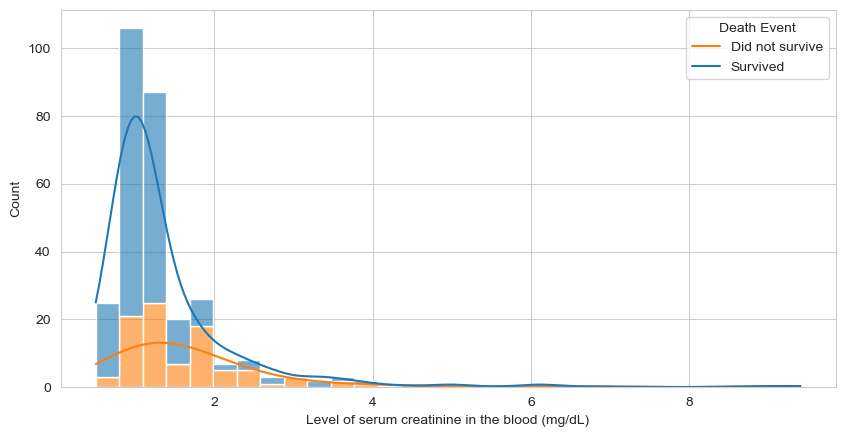

In [11]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Level of serum creatinine in the blood (mg/dL)')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `serum_sodium` Feature Analysis

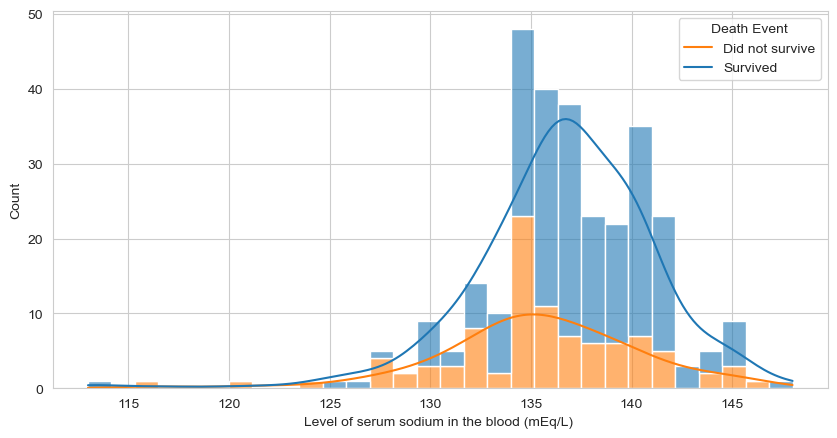

In [12]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df, x='serum_sodium', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Level of serum sodium in the blood (mEq/L) ')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### `sex ` Feature Analysis

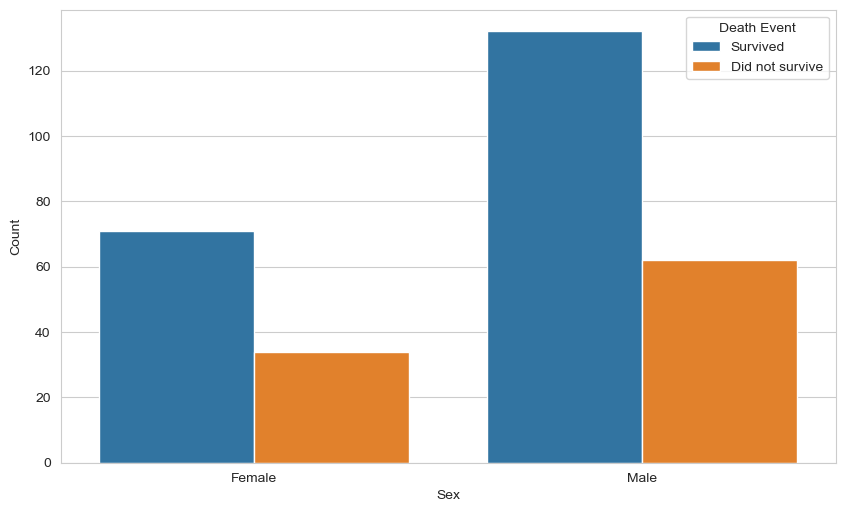

In [13]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='sex', hue='DEATH_EVENT')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `smoking` Feature Analysis

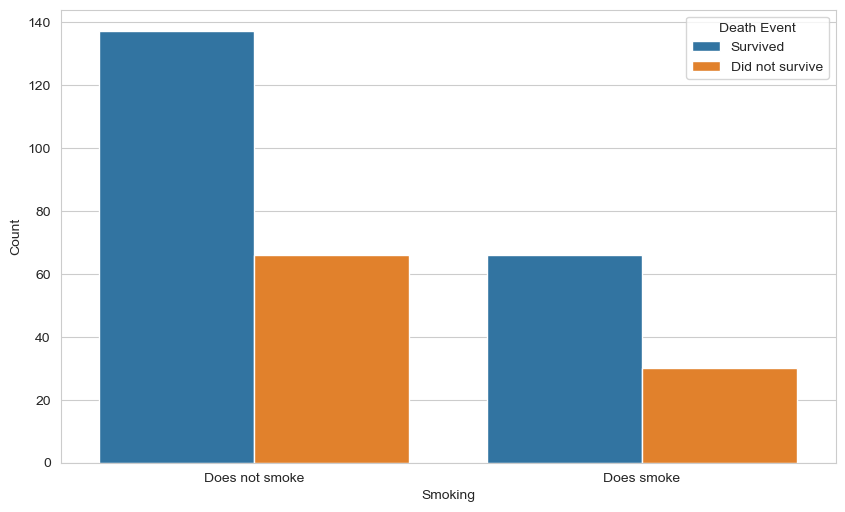

In [14]:
plt.figure(figsize=(10,6), dpi=100)
sns.countplot(data=df, x='smoking', hue='DEATH_EVENT')

plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks([0, 1], ['Does not smoke', 'Does smoke'])
plt.legend(title='Death Event', loc='best', labels=['Survived', 'Did not survive'])
plt.show()

### `time` Feature Analysis

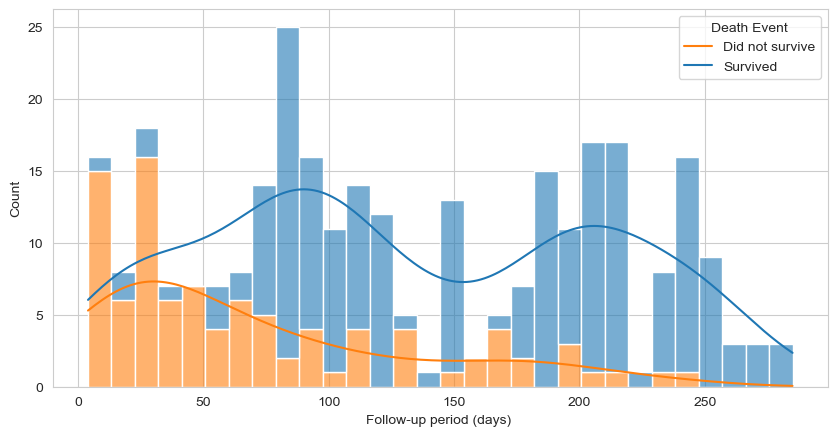

In [15]:
plt.figure(figsize=(10, 5), dpi=100)
sns.histplot(data=df, x='time', hue='DEATH_EVENT', bins=30, multiple='stack', alpha=0.6, kde=True)
plt.xlabel('Follow-up period (days) ')
plt.ylabel('Count')
plt.legend(title='Death Event', loc='best', labels=['Did not survive', 'Survived'])
plt.show()

### Correlation Heatmap

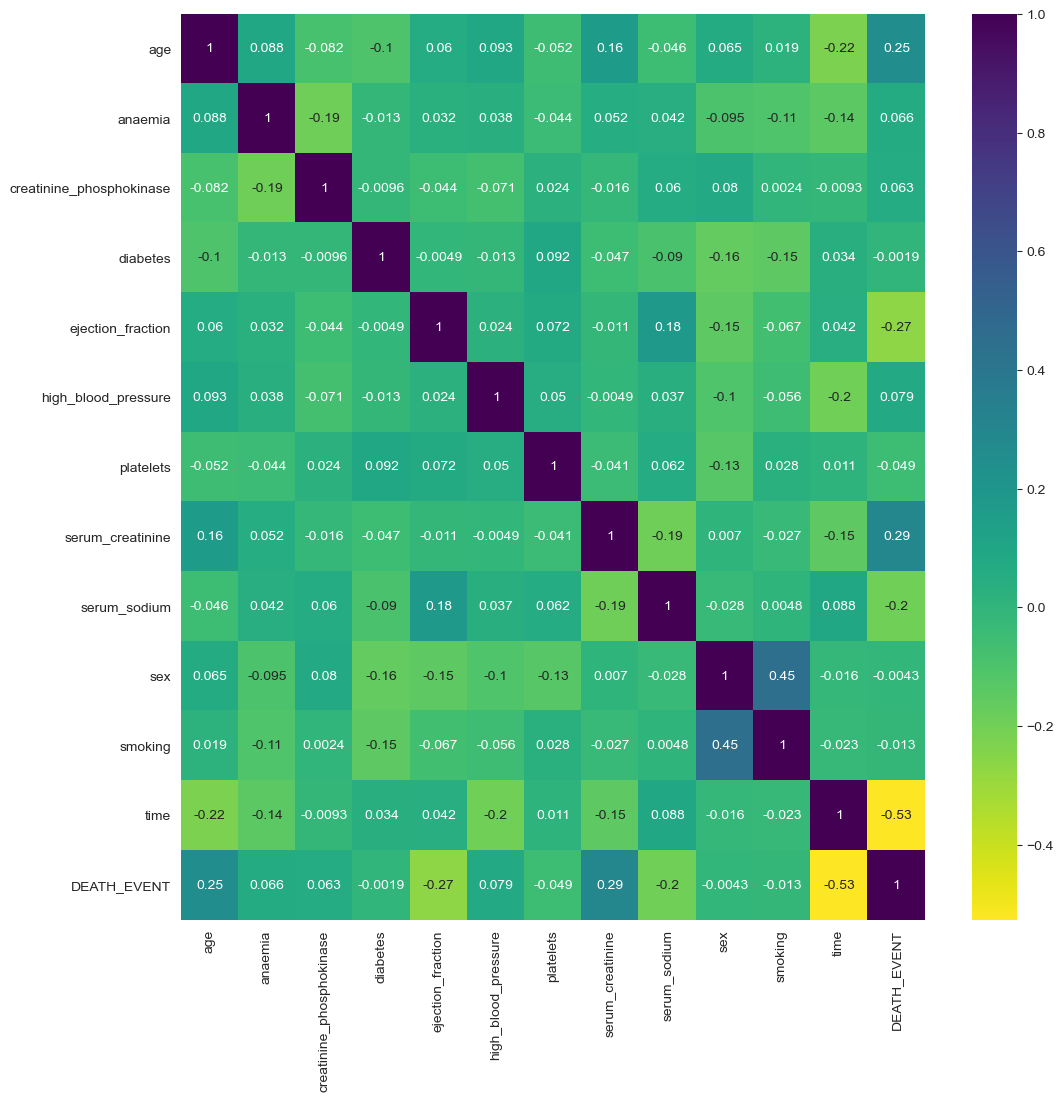

In [16]:
plt.figure(figsize=(12, 12), dpi=100)
sns.heatmap(df.corr(), cmap='viridis_r', annot=True)
plt.show()

### Feature Selection

In [17]:
features = list(df.drop('DEATH_EVENT', axis=1).columns)
X = df[features].values
y = df['DEATH_EVENT'].values

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

## Model Selection

### Logistic Regression

In [18]:
models = []
accuracies = []

from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.5, 0.75, 1, 2], 'max_iter':[1000]}
lr = GridSearchCV(LogisticRegression(), param_grid, cv=5)
lr.fit(X_train, y_train)
lr_score = lr.best_score_ * 100
print('Accuracy of logistic regression model: {:.2f}%'.format(lr_score))

models.append('LogisticRegression')
accuracies.append(lr_score)

Accuracy of logistic regression model: 79.55%


### Support Vector Classifier (SVC)

In [19]:
from sklearn.svm import SVC
param_grid = {'C':[0.5, 0.75, 1, 2], 'kernel':['rbf']}
svc = GridSearchCV(SVC(random_state=0), param_grid, cv=5)
svc.fit(X_train, y_train)
svc_score = svc.best_score_ * 100
print('Accuracy of svc model: {:.2f}%'.format(svc_score))

models.append('SVC')
accuracies.append(svc_score)

Accuracy of svc model: 67.78%


### K-Nearest Neighbors (KNN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors':[3, 4, 5, 6, 7], 'metric':['minkowski']}
knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn.fit(X_train, y_train)
knn_score = knn.best_score_ * 100
print('Accuracy of knn model: {:.2f}%'.format(knn_score))

models.append('KNeighborsClassifier')
accuracies.append(knn_score)

Accuracy of knn model: 66.11%


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion':['gini', 'entropy']}
tree = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
tree.fit(X_train, y_train)
tree_score = tree.best_score_ * 100
print('Accuracy of decision tree model: {:.2f}%'.format(tree_score))

models.append('DecisionTreeClassifier')
accuracies.append(tree_score)

Accuracy of decision tree model: 76.99%


### Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'criterion':['gini', 'entropy'], 'n_estimators':[80, 100, 120, 140, 200]}
rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
rf.fit(X_train, y_train)
rf_score = rf.best_score_ * 100
print('Accuracy of random forest model: {:.2f}%'.format(rf_score))

models.append('RandomForestClassifier')
accuracies.append(rf_score)

Accuracy of random forest model: 84.53%


### Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'learning_rate':[0.01, 0.1, 1], 'n_estimators':[100, 120, 140, 160, 200],
              'subsample':[0.8, 1], 'max_depth':[2, 4, 6, 8]}
gbc = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid, cv=5)
gbc.fit(X_train, y_train)
gbc_score = gbc.best_score_ * 100
print('Accuracy of gradient boosting model: {:.2f}%'.format(gbc_score))


models.append('GradientBoostingClassifier')
accuracies.append(gbc_score)

Accuracy of gradient boosting model: 83.69%


### XGBClassifier

In [24]:
from xgboost import XGBClassifier
param_grid = {'learning_rate':[0.01, 0.1, 1], 'n_estimators':[100, 120, 140, 160, 200],
              'subsample':[0.8, 1], 'max_depth':[2, 4, 6, 8]}
xgb = GridSearchCV(XGBClassifier(random_state=0), param_grid, cv=5)
xgb.fit(X_train, y_train)
xgb_score = xgb.best_score_ * 100
print('Accuracy of xgb model: {:.2f}%'.format(xgb_score))

models.append('XGBClassifier')
accuracies.append(xgb_score)

Accuracy of xgb model: 83.29%


### XGBRFClassifier

In [25]:
from xgboost import XGBRFClassifier
param_grid = {'learning_rate':[0.01, 0.1, 1], 'n_estimators':[100, 120, 140, 160, 200],
              'subsample':[0.8, 1], 'max_depth':[2, 4, 6, 8]}
xgbrf = GridSearchCV(XGBRFClassifier(random_state=0), param_grid, cv=5)
xgbrf.fit(X_train, y_train)
xgbrf_score = xgbrf.best_score_ * 100
print('Accuracy of xgbrf model: {:.2f}%'.format(xgbrf_score))

models.append('XGBRFClassifier')
accuracies.append(xgbrf_score)

Accuracy of xgbrf model: 81.20%


## Model Comparison on the Training Set

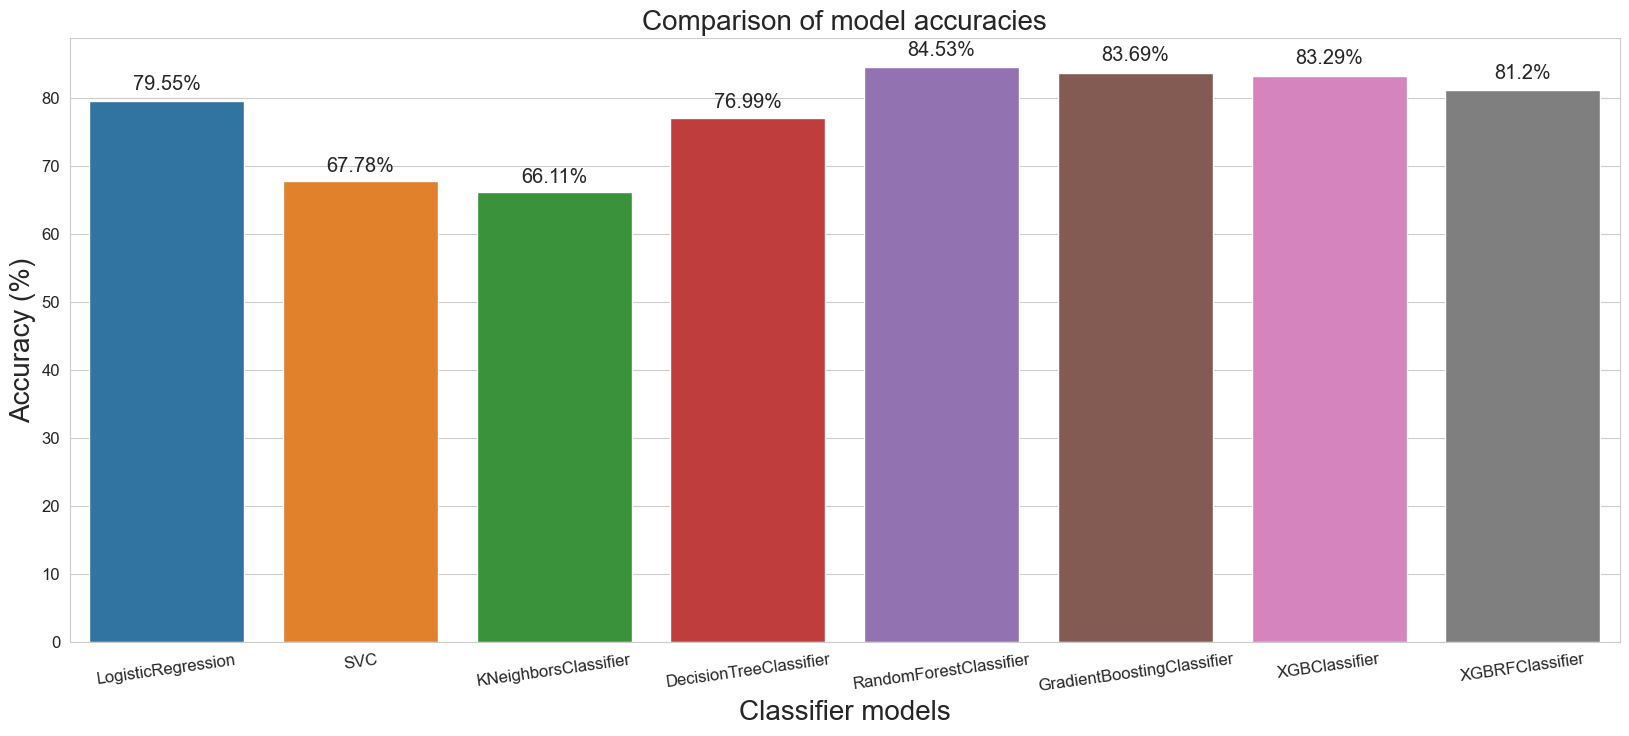

In [26]:
plt.figure(figsize=(20,8), dpi=100)
ax = sns.barplot(x=models, y=accuracies)
plt.title('Comparison of model accuracies', fontsize=20)
plt.xlabel('Classifier models', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Final Model Selection

From what we have seen, the model `RandomForestClassifier` performed best, with an accuracy of 84.63% on the training set. For this reason, we will use `RandomForestClassifier` as our final model.

### Confusion Matrix and Classification Report on the Test Set

In [27]:
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
rf_score = rf.score(X_test, y_test)
print('Accuracy on the test set: {:.2f}%'.format(rf_score * 100))
print('\n')
print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
print('Classification Report:\n{}'.format(classification_report(y_test, y_pred)))

Accuracy on the test set: 85.00%


Confusion Matrix:
[[38  3]
 [ 6 13]]


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        41
           1       0.81      0.68      0.74        19

    accuracy                           0.85        60
   macro avg       0.84      0.81      0.82        60
weighted avg       0.85      0.85      0.85        60



### AUC-ROC Curve on the Test Set

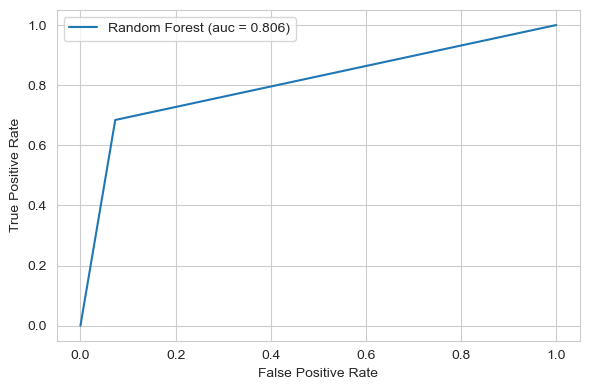

In [28]:
from sklearn.metrics import roc_curve, auc

rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, y_pred)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(dpi=100)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (auc = {:.3f})'.format(rf_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Feature importances

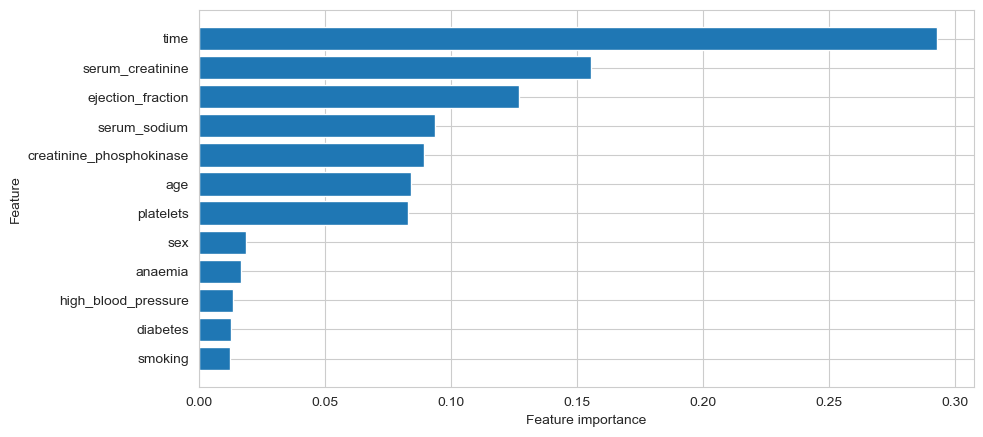

In [29]:
rf_temp = rf.best_estimator_
features = np.array(df.columns)
importances = rf_temp.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 5), dpi=100)
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

We will now check what hyperparameters were used by the `RandomForestClassifier` model.

In [30]:
rf.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

The model used information gain as its function to measure the quality of a split, and it used 100 estimators (trees).

### Comparison of `RandomForestClassifier` Models with Varying Features Used

In [31]:
models = ['All features', 'Top 3 features', 'Top 2 clinical features']
accuracies_train = []
accuracies_test = []

rf_score = rf.score(X_test, y_test) * 100
accuracies_test.append(rf_score)

features = ['serum_creatinine', 'ejection_fraction', 'time']
X = df[features].values
y = df['DEATH_EVENT'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)
param_grid = {'criterion':['gini', 'entropy'], 'n_estimators':[80, 100, 120, 140, 200]}
rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test) * 100
accuracies_test.append(rf_score)

features = ['serum_creatinine', 'ejection_fraction']
X = df[features].values
y = df['DEATH_EVENT'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)
rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test) * 100
accuracies_test.append(rf_score)

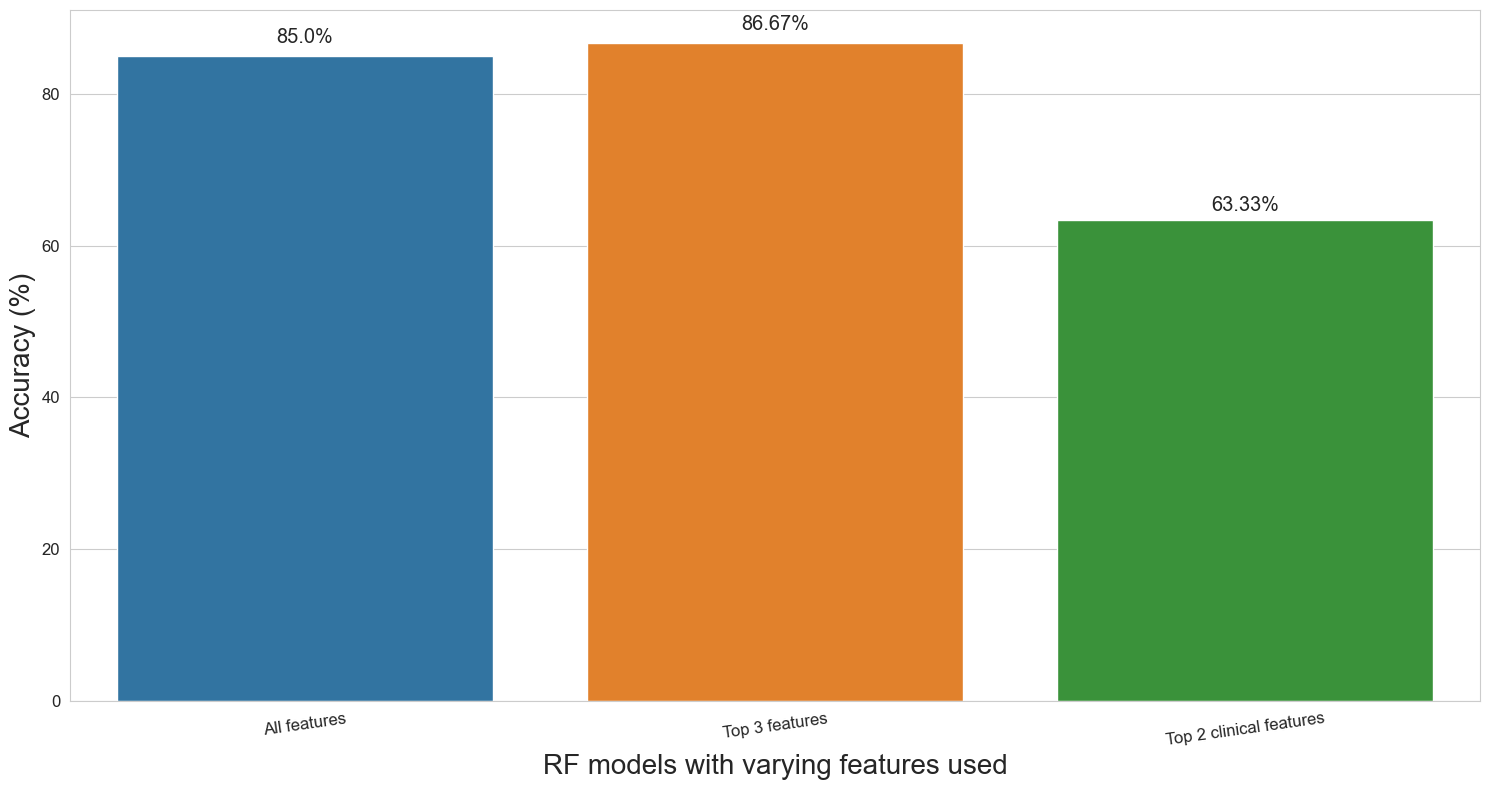

In [32]:
plt.figure(figsize=(15,8), dpi=100)
ax = sns.barplot(x=models, y=accuracies_test)
plt.xlabel('RF models with varying features used', fontsize=20)
plt.ylabel('Accuracy (%)', fontsize=20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.tight_layout()
plt.show()

We see that the model generalized better when train only on the features `time`, `serum_creatinine`, and `ejection_fraction`. This may be because using all features added some "noise" to the predictability of the model.

And that's it for this Jupyter notebook! The best accuracy obtained during training among the models studied was 84.53% by `RandomForestClassifier`. When tested on the test set, the model obtain an accuracy of 85%. For further analysis, you may apply the following machine learning models and see if it can perform better:
- LightGBM
- CatBoost
- Tensorflow

We would like you to know that we used *all* features when building the model due to the findings we have written in the RRL chapter of our paper. We highly encourage those who choose to expound on these results of ours to gather more data, and hopefully you will see more importance on features like `ejection_fraction` as it is indeed a major contributing factor to heart failure.